https://pytorch.org/


# **Setting up our Environment**
we started by importing software libraries we need to build our neural network. We will import PyTorch and check the version of PyTorch that has been imported.


In [ ]:
# Import PyTorch libraries
import torch
from torch import nn

# Import visualization library
import matplotlib.pyplot as plt

# Verify PyTorch version
torch.__version__

'1.12.1+cu113'

# **Check Our Processing Capability (CPU vs. GPU)**
When developing A.I. projects, it will help to have a powerful GPU

In [ ]:
# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was detected.'.format(device))

# Print the name of the cuda device, if detected
if device=='cuda':
    print (torch.cuda.get_device_name(device=device))

A cpu device was detected.


# **Download and Preparing our Dataset**

> Indented block


When training a neural network from scratch, you will usually need a lot of data. We will start by loading all the lemonade stand data for one year (365 items) which is a rather small, simply synthetic dataset. It includes information about the day the lemonade was sold including whether or not it was a weekend, sunny, warm, a big sign was present to advertise and the price. Finally, there is the number of lemonade's sold. Our neural network will be trained to predict the number of lemonade's sold (output) based on the other attributes (inputs).

In [ ]:
# Use Pandas to do our dataprocessing on the dataset
# Download the dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/LeakyAI/FirstNeuralNet/main/lemons.csv'
df = pd.read_csv(url)

# Explore the first 10 rows of the dataset
df.head(10)

,Weekend,Sunny,Warm,BigSign,Price,NumberSold
0,1,0,0,1,9,71
1,1,1,1,0,10,137
2,0,1,0,0,10,0
3,1,0,0,1,6,107
4,1,0,0,1,8,80
5,1,1,0,0,6,110
6,1,1,1,0,8,167
7,0,0,1,1,8,0
8,1,0,1,0,8,124
9,1,1,0,0,7,95


In [ ]:
# Check the size/shape of our dataset
df.shape

(365, 6)

 are used to return size, shape and dimensions of data frames and series.  holictic size and it will tell use the 365 items with each item having 6 unique value

# **Create our Inputs and Outputs for Training our Neural Network**
The data has been collected in a table with the following columns

While the dataset is more or less ready to be used, we have two fields (Price and NumberSold) that contain real values. Usually, it's easier to train neural networks if the values used are in the range rough range of -1..1. We will first reduce the range of Price and NumberSold down using standardization.

In [ ]:
# Calculate the mean and standard deviation of price
# Standardize numSold
priceMean = df['Price'].mean()
priceStd = df['Price'].std()
df['Price'] = (df['Price']-priceMean)/priceStd

# Calculate the mean and standard deviation of numSold
# Standardize numSold
numSoldMean = df['NumberSold'].mean()
numSoldStd = df['NumberSold'].std()
df['NumberSold'] = (df['NumberSold']-numSoldMean)/numSoldStd

In [ ]:
df.head()

,Weekend,Sunny,Warm,BigSign,Price,NumberSold
0,1,0,0,1,0.846650,-0.023669
1,1,1,1,0,1.452587,0.743734
2,0,1,0,0,1.452587,-0.849208
3,1,0,0,1,-0.971158,0.394915
4,1,0,0,1,0.240714,0.080977


now here values got standerized and indeed thet are we now have a total data set that is on the order of somewhere between minus one and one for all values.

# **Create our Input (x) and Ouput (y) to Train our Neural Network**
Here you will create the input (x) and output (y) variables needed to train our network. The number we want our neural network to predict is the field called 'NumberSold'. This will be the output (y). We will need to seperate out our input (Weekend, Sunny, Warm, BigSign, Price) from the ouput (NumberSold).

In [ ]:
# Create our PyTorch tensors and move to CPU or GPU if available
# Extract the inputs and create a PyTorch tensor x (inputs)
inputs = ['Weekend', 'Sunny', 'Warm', 'BigSign', 'Price']
x = torch.tensor(df[inputs].values, dtype=torch.float, device=device)

# Extract the outputs and create a PyTorch tensor y (outputs)
outputs = ['NumberSold']
y = torch.tensor(df[outputs].values,dtype=torch.float, device=device)

in x line it basically pull those columns out and put them into a PyTorch sensor which is kind of a generic data store for our input X

In [ ]:
# Explore the first 5 inputs
x[0:5]

tensor([[ 1.0000,  0.0000,  0.0000,  1.0000,  0.8467],
        [ 1.0000,  1.0000,  1.0000,  0.0000,  1.4526],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.4526],
        [ 1.0000,  0.0000,  0.0000,  1.0000, -0.9712],
        [ 1.0000,  0.0000,  0.0000,  1.0000,  0.2407]])

fibve lines of X the first five rows and here we have them we can see that we have all the columns and there the last one is also equally nicely standerized

In [ ]:
# Explore the first 5 outputs
y[0:5]

tensor([[-0.0237],
        [ 0.7437],
        [-0.8492],
        [ 0.3949],
        [ 0.0810]])

# **Building our Neural Network**
Below you will build a simply neural network that will take in the inputs above (5) and produce a single value as an output.  This network has a single hidden layer of 100 units

In [ ]:
# Define your PyTorch neural network
# Number of Inputs: 5
# Number of Hidden Units: 100
# Number of Hidden Layers: 1
# Activation Function:  Relu
# Number of Ouputs: 1
model = nn.Sequential(
            nn.Linear(5, 100),
            nn.ReLU(),
            nn.Linear(100,1)
        )

# Move it to either the CPU or GPU depending on what we have available
model.to(device)

Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

we have build a neural network that has a single hidden layer, this is just in between the input and the output and that will have 100units.
now using sequential call using pytorch
relu doesnot allowed all the neurons at the same time     recified linear activaion units   tahts why its so good.

# **Training our Neural Network**
Here we will simply train our neural network on the dataset. We will provide it with an input and and output. The training loop will then adjust the weights within the neural network to make it more accuarate as we go through the training process.

In [ ]:
import torch.optim as optim

# Meausure our neural network by mean square error
criterion = torch.nn.MSELoss()

# Train our network with a simple SGD approach
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train our network a using the entire dataset 5 times
for epoch in range(5):
    totalLoss = 0
    for i in range(len(x)):

        # Single Forward Pass
        ypred = model(x[i])

        # Measure how well the model predicted vs actual
        loss = criterion(ypred, y[i])


        # Track how well the model predicted
        totalLoss+=loss.item()

        # Update the neural network
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print out our loss after each training iteration
    print ("Total Loss: ", totalLoss)

Total Loss:  129.8105291480466
Total Loss:  10.182768939864928
Total Loss:  6.294642417779372
Total Loss:  5.056610152100262
Total Loss:  3.9941290454862752


here we have to specify two functions
first one is that how to measure how well the network is doing at predicting the results
2nd one is to define is the way the training process will update the neural network as we progress through the training  these two thing s are call ed the criterion.

and optimizer is usedto  the methodology for how we actually go about updating the weights

here we use Mean square error  iis the most common type way to measure a neural networj performance if it's predicting values

optimizer we choose SGD  is a common optimizer we need to give it all th neural network which is weights which is called model dot parameters

lr is learning way


for single forward pass we do is call model which is our defined neural network and pass it int the input we want to process

loss is higheer when its further and lower when its closer.

After  running th emodel we are gonnasee that the loss value is gonna decrease at every iteration as long as it is decreasing the neural network is starting to learn hw the inputs  mao to the output

# **Analyze the Network's Performance**

In [ ]:
# Plot predictions vs. true values
@torch.no_grad()
def graphPredictions(model, x, y , minValue, maxValue):

    model.eval()                               # Set the model to inference mode

    predictions=[]                             # Track predictions
    actual=[]                                  # Track the actual labels

    x.to(device)
    y.to(device)
    model.to(device)

    for i in range(len(x)):

        # Single forward pass
        pred = model(x[i])

        # Un-normalize our prediction
        pred = pred*numSoldStd+numSoldMean
        act = y[i]*numSoldStd+numSoldMean

        # Save prediction and actual label
        predictions.append(pred.tolist())
        actual.append(act.item())

    # Plot actuals vs predictions
    plt.scatter(actual, predictions)
    plt.xlabel('Actual Lemonades Sold')
    plt.ylabel('Predicted Lemonades Sold')
    plt.plot([minValue,maxValue], [minValue,maxValue])
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)

    # Make the display equal in both dimensions
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

how well it is able to make predictions and we should be predicted by the way it predicted and what it should have been.

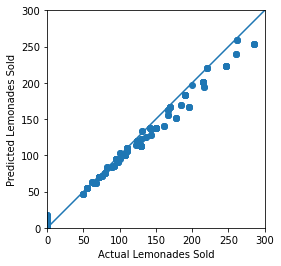

In [ ]:
graphPredictions(model, x, y, 0, 300)

at the botton of the axis we have actual number of lemonade sold on a particular day.

# **Tesingt with our Own Predictions**

in this section we specify our own value for weekend, sunny , warm,big sign, and price and then use our neural network to make preictions.

In [ ]:
# Below we use the synthetic data generator forumla to
# determine what the actual result should have been.
def datasetGenerator(weekend, sunny, warm, bigsign, price):
    numlemonssold = 0
    if weekend:
        numlemonssold = (sunny*5  + int(500 / price))
        if bigsign:
            numlemonssold = 1.3 * numlemonssold
        if warm:
            numlemonssold = 2 * numlemonssold
        if sunny:
            numlemonssold = 1.25 * numlemonssold
    numlemonssold = int(numlemonssold)
    return numlemonssold

# **Using these we can specify our own values for weekend sunny warm bug sign and then use our neural network**

In [ ]:
# Data that affects the number of lemons sold in one day
weekend = 1
sunny = 0
warm = 0
bigsign = 1
price = 5

# Calculate what would have been the actual result using
# the synthetic dataset's algorithm
actual = datasetGenerator(weekend, sunny, warm, bigsign, price)

# Use the CPU as we just need to do a single pass
model.to('cpu')

# Normalize our inputs using the same values for our training
price = (price - priceMean) / priceStd

# Create our input tensor
x1 = torch.tensor([weekend, sunny, warm, bigsign, price],dtype=float)

# Pass the input into the neural network
y1 = model(x1.float())

# Un-normalize our output y1
y1 = y1*numSoldStd+numSoldMean

# Compare what your network predicted to the actual
print ("Neural Network Predicts: ", y1.item())
print ("Actual Result: ", actual)

Neural Network Predicts:  122.80099487304688
Actual Result:  130
